# Project Title :
# **Telco Customer Chrun Prediction**

# Problem Statment:

Create a predictive model to forecast customer churn for a telecom company using customer data. The goal is to accurately identify customers at risk of leaving, so the company can focus its retention strategies on those who need it most, while avoiding wasted efforts on customers who are unlikely to churn.

In [ ]:
# URL for dataset : https://drive.google.com/file/d/1dht-fUhzmbrwNE0xpjVRfOzHiFTnRUIy/view?usp=drive_link

# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_data = pd.read_csv(r"/content/drive/MyDrive/csv_files/ML PR CLF/Telco-Customer-Churn.csv")
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview

In [ ]:
train_data.shape

(7043, 21)

In [ ]:
train_data.size

147903

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# here in dataset "TotalCharges" datatype is Wrong
# train_data["TotalCharges"] = train_data["TotalCharges"].astype("float") when there are empty value in so conversion not happen.
# error = ValueError: could not convert string to float: ' '
# so do this step during handling null value

In [ ]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation:
The 25th, 50th, and 75th percentiles for "SeniorCitizen" are all 0, showing that at least 75% of the values are 0. This confirms that "SeniorCitizen" is a binary categorical variable, with most entries being 0 ("not a senior citizen").

<Axes: ylabel='Frequency'>

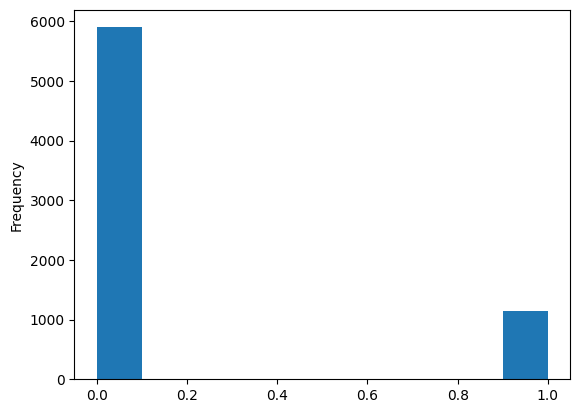

In [ ]:
train_data["SeniorCitizen"].plot(kind="hist")

result: This histogram, along with the descriptive statistics, will confirm that "SeniorCitizen" is a categorical variable.

In [ ]:
# Check for missing value
train_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
train_data[train_data["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Observation : There '  ' empty value in TotalCharegs.There are less no. of value so remove empty value.

In [ ]:
train_data["TotalCharges"] = train_data["TotalCharges"].replace(" ", np.nan)

In [ ]:
train_data["TotalCharges"].isnull().sum()

11

In [ ]:
# drop null value
train_data.dropna(inplace=True)

In [ ]:
# recheck
train_data["TotalCharges"].isnull().sum()

0

In [ ]:
# convert Datatype of "TotalCharges"
train_data["TotalCharges"] = train_data["TotalCharges"].astype("float64")

In [ ]:
# Drop the 'customerID' column as it is not useful for prediction
train_data.drop("customerID", axis=1, inplace=True)

In [ ]:
# Check and print the number of duplicate rows in the datase
print(f"Number of duplicate rows in train_data: {train_data.duplicated().sum()}")
print("Removing duplicate rows...")
train_data.drop_duplicates(inplace=True,keep = "first")
print(f"Number of duplicate rows after removal:{train_data.duplicated().sum()} ")

Number of duplicate rows in train_data: 22
Removing duplicate rows...
Number of duplicate rows after removal:0 


In [ ]:
# Numeric value EDA

In [ ]:
numeric_column = [col for col in train_data.columns if train_data[col].dtype != "O"]
numeric_column

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
numeric_col = ['tenure', 'MonthlyCharges','TotalCharges']

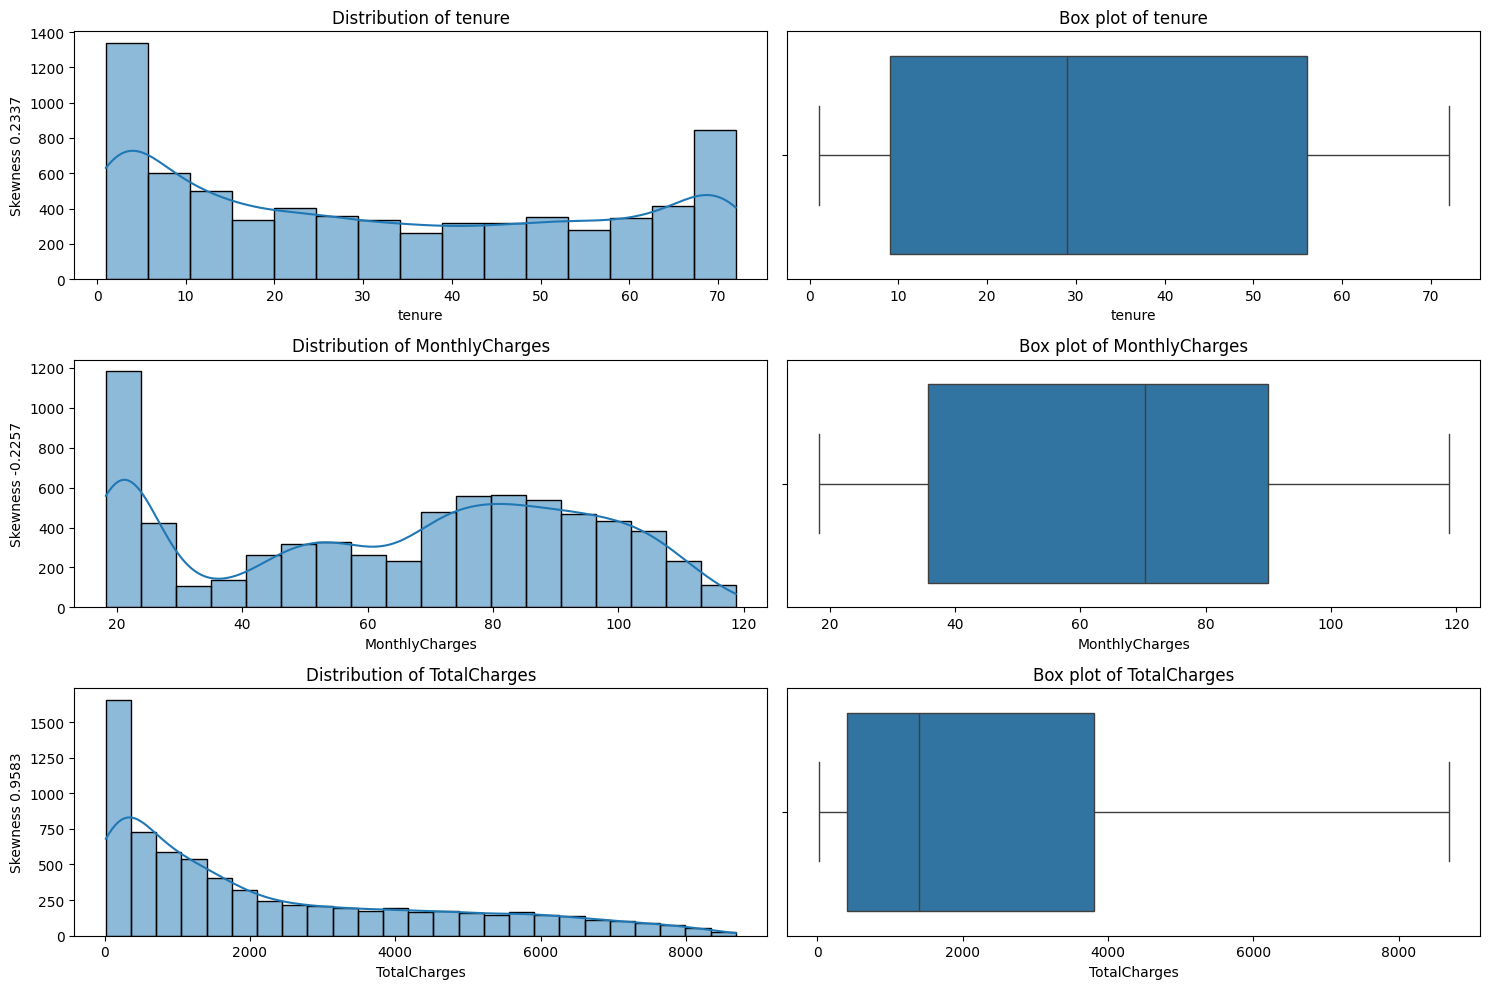

In [ ]:
# Check the distribution of numeric_col
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_col):
    # Histogram
    plt.subplot(len(numeric_col), 2, 2*i+1)
    sns.histplot(train_data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel(f"Skewness {train_data[col].skew():.4f}")
    plt.title(f"Distribution of {col}")

    # Box plot
    plt.subplot(len(numeric_col), 2, 2*i+2)
    sns.boxplot(x=train_data[col])
    plt.xlabel(col)
    plt.title(f"Box plot of {col}")

plt.tight_layout()

Observation:
Here’s how you can combine the statements for each column:

**Tenure**:
- The distribution is right-skewed, indicating that a majority of customers have been with the company for a shorter duration.
-The box plot shows outliers on the higher end, suggesting that some customers have been with the company for significantly longer periods.

**Monthly Charges**:
- The distribution is relatively normal with a slight left skew.
- The box plot reveals a wider interquartile range, indicating a more varied distribution of monthly charges among customers.

**Total Charges**:
- The distribution is strongly right-skewed, suggesting that a large proportion of customers have lower total charges.
- The box plot shows outliers on the higher end, indicating that a few customers have incurred significantly higher total charges.

In [ ]:
# Univarite analysis for numericla columns
numeric_col = ['tenure', 'MonthlyCharges','TotalCharges']

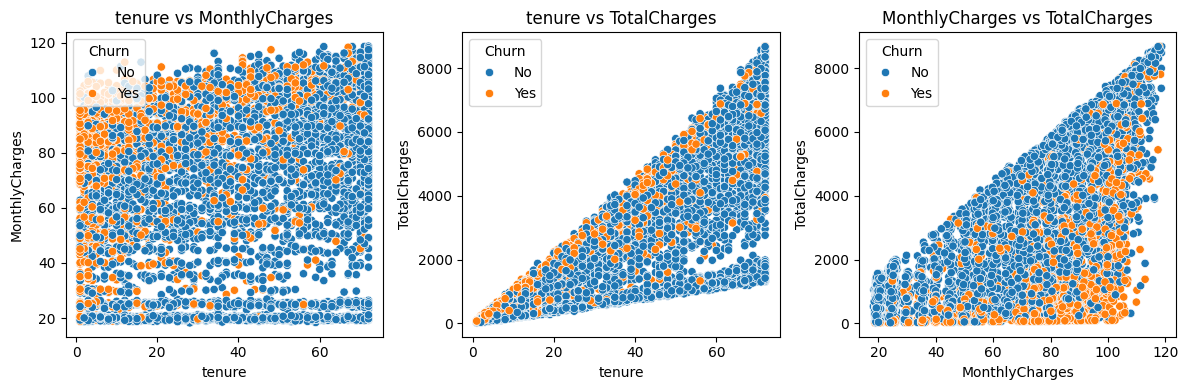

In [ ]:
# scatter plot tenure vs MonthlyCharges
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(data=train_data,
                x="tenure",
                y="MonthlyCharges",
                hue ="Churn")
plt.title("tenure vs MonthlyCharges")

plt.subplot(1,3,2)
sns.scatterplot(data=train_data,
                x="tenure",
                y="TotalCharges",
                hue ="Churn")
plt.title("tenure vs TotalCharges")

plt.subplot(1,3,3)
sns.scatterplot(data=train_data,
                x="MonthlyCharges",
                y="TotalCharges",
                hue ="Churn")
plt.title("MonthlyCharges vs TotalCharges")
plt.tight_layout()

Observation:

**Tenure vs. Monthly Charges:**

- There isn’t a clear straight-line relationship between tenure and monthly charges.
- Customers who leave (churn) tend to have shorter tenures and higher monthly charges.


**Tenure vs. Total Charges:**

- There is a clear upward trend: the longer a customer stays, the higher their total charges.
- Churn is more common among customers with lower total charges.


**Monthly Charges vs. Total Charges:**

- There is a strong upward trend: higher monthly charges lead to higher total charges.
- Customers who churn are more often those with lower monthly and total charges.

<Axes: >

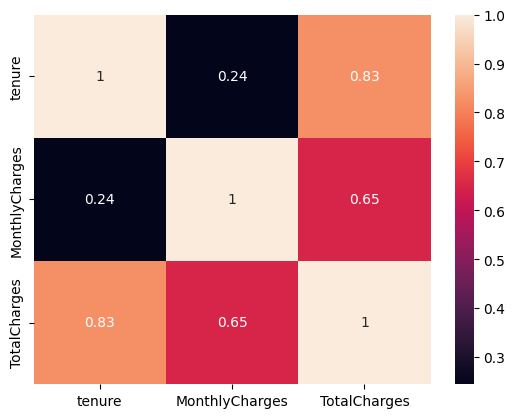

In [ ]:
sns.heatmap(train_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),annot= True)

In [ ]:
corr_matrics = train_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
print(corr_matrics)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.244194      0.825293
MonthlyCharges  0.244194        1.000000      0.650540
TotalCharges    0.825293        0.650540      1.000000


Observation:

TotalCharges and MonthlyCharges have a strong positive correlation of 0.83, indicating that customers with higher monthly charges tend to have higher total charges.

In [ ]:
# univariate Analysis of Categorical variable

In [ ]:
Categorical_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
Categorical_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

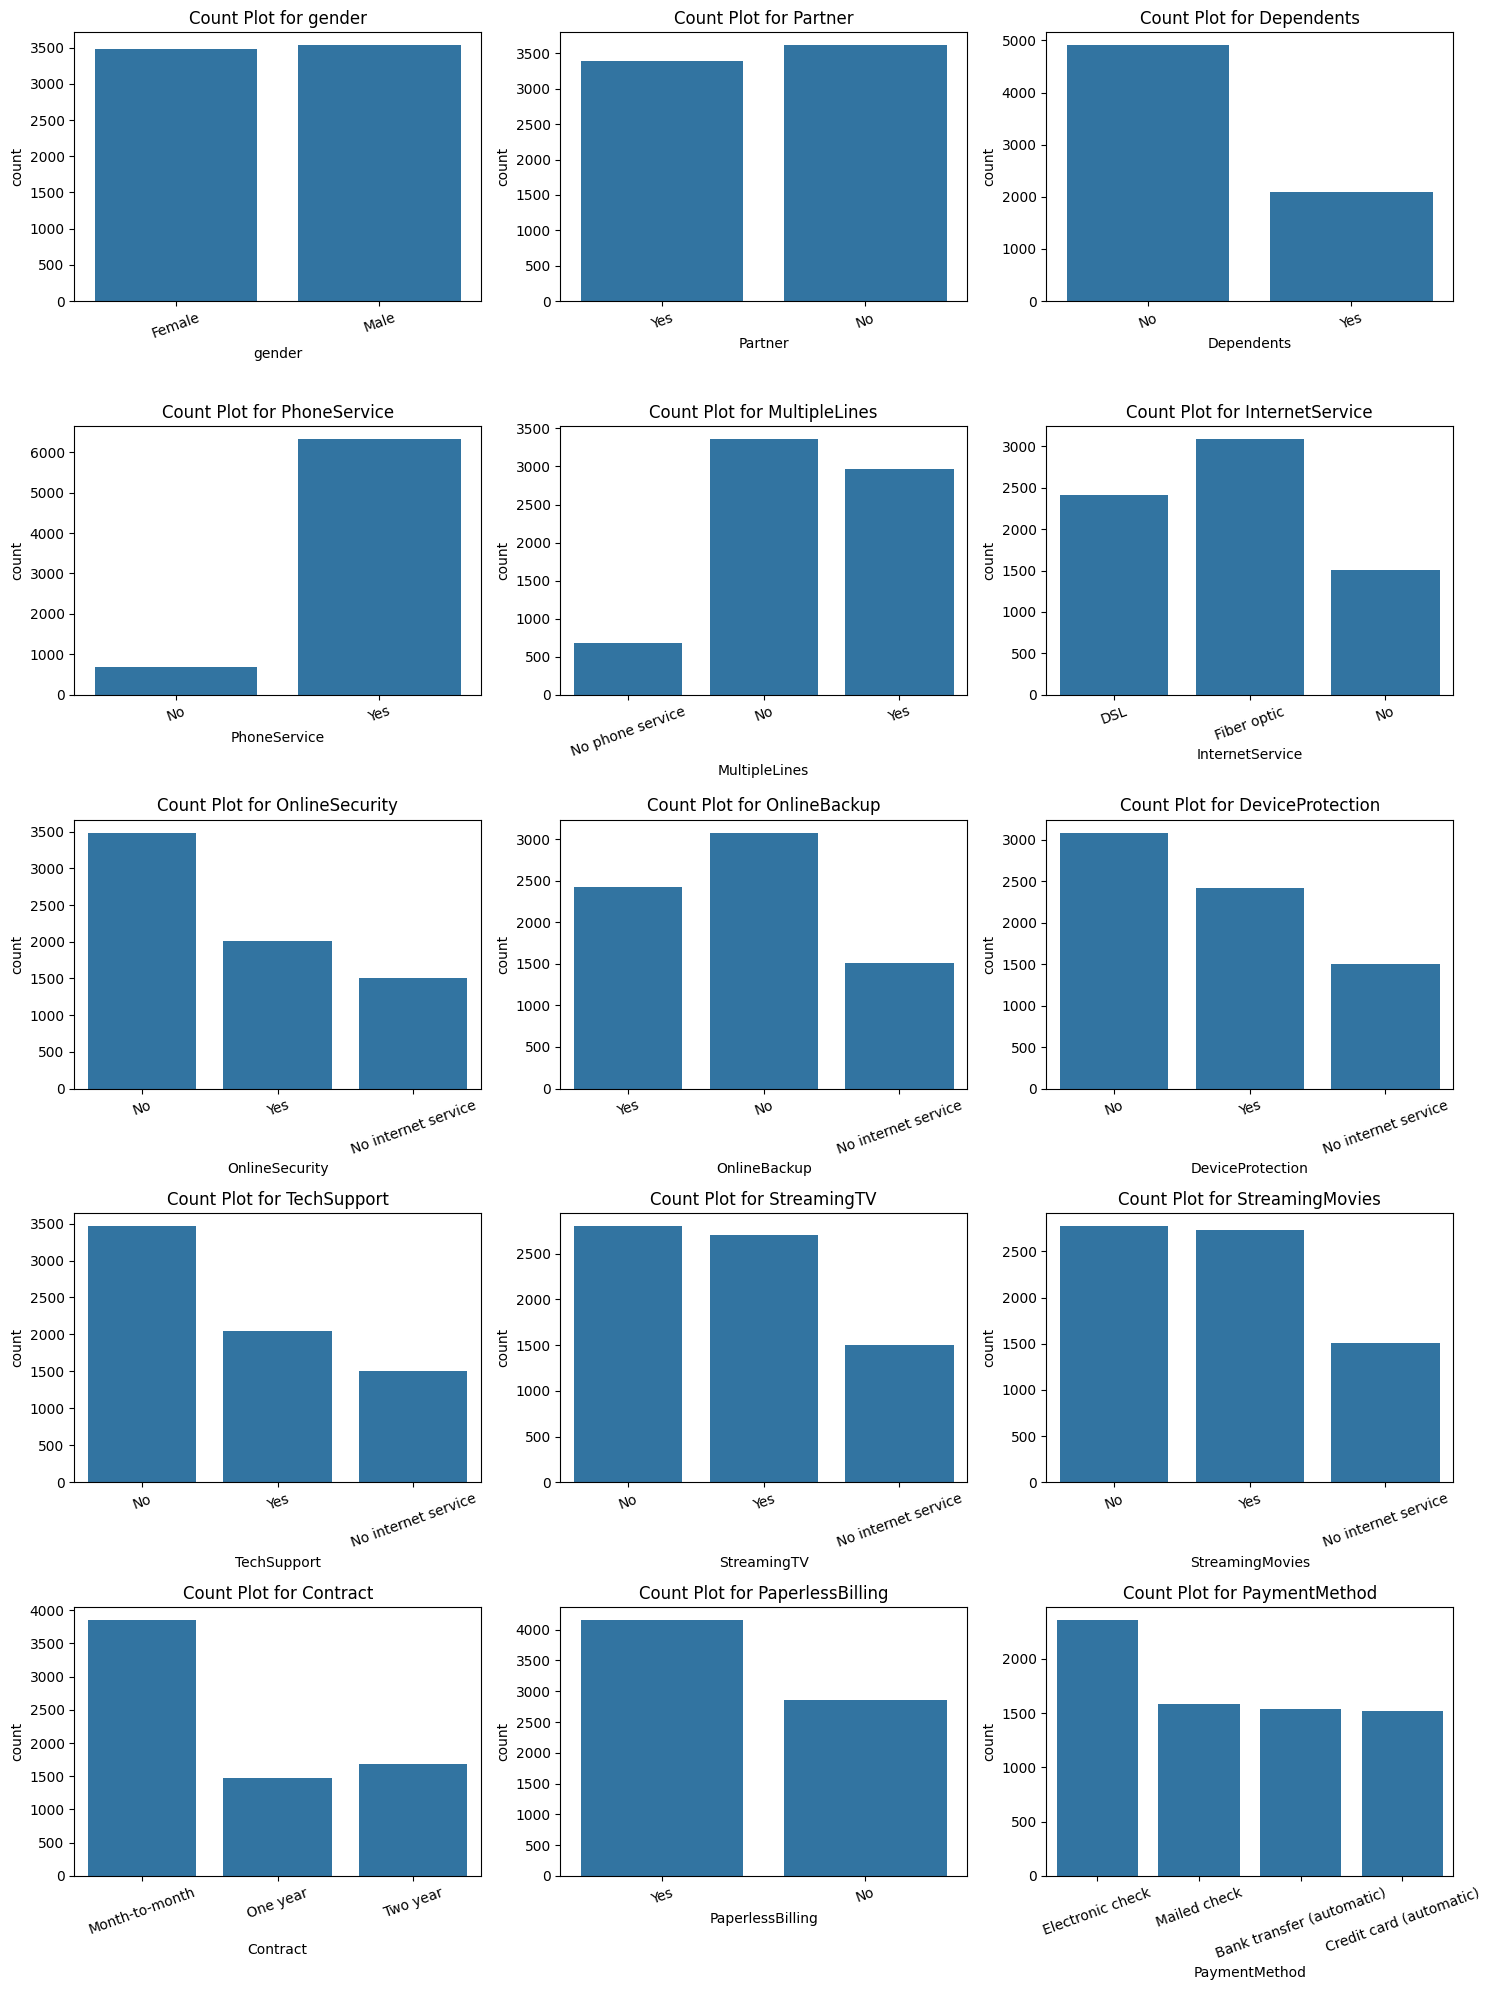

In [ ]:
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Distribution of categorical columns
plt.figure(figsize=(15, 20))

for i, feature in enumerate(categorical_features):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=20)
    plt.tight_layout()

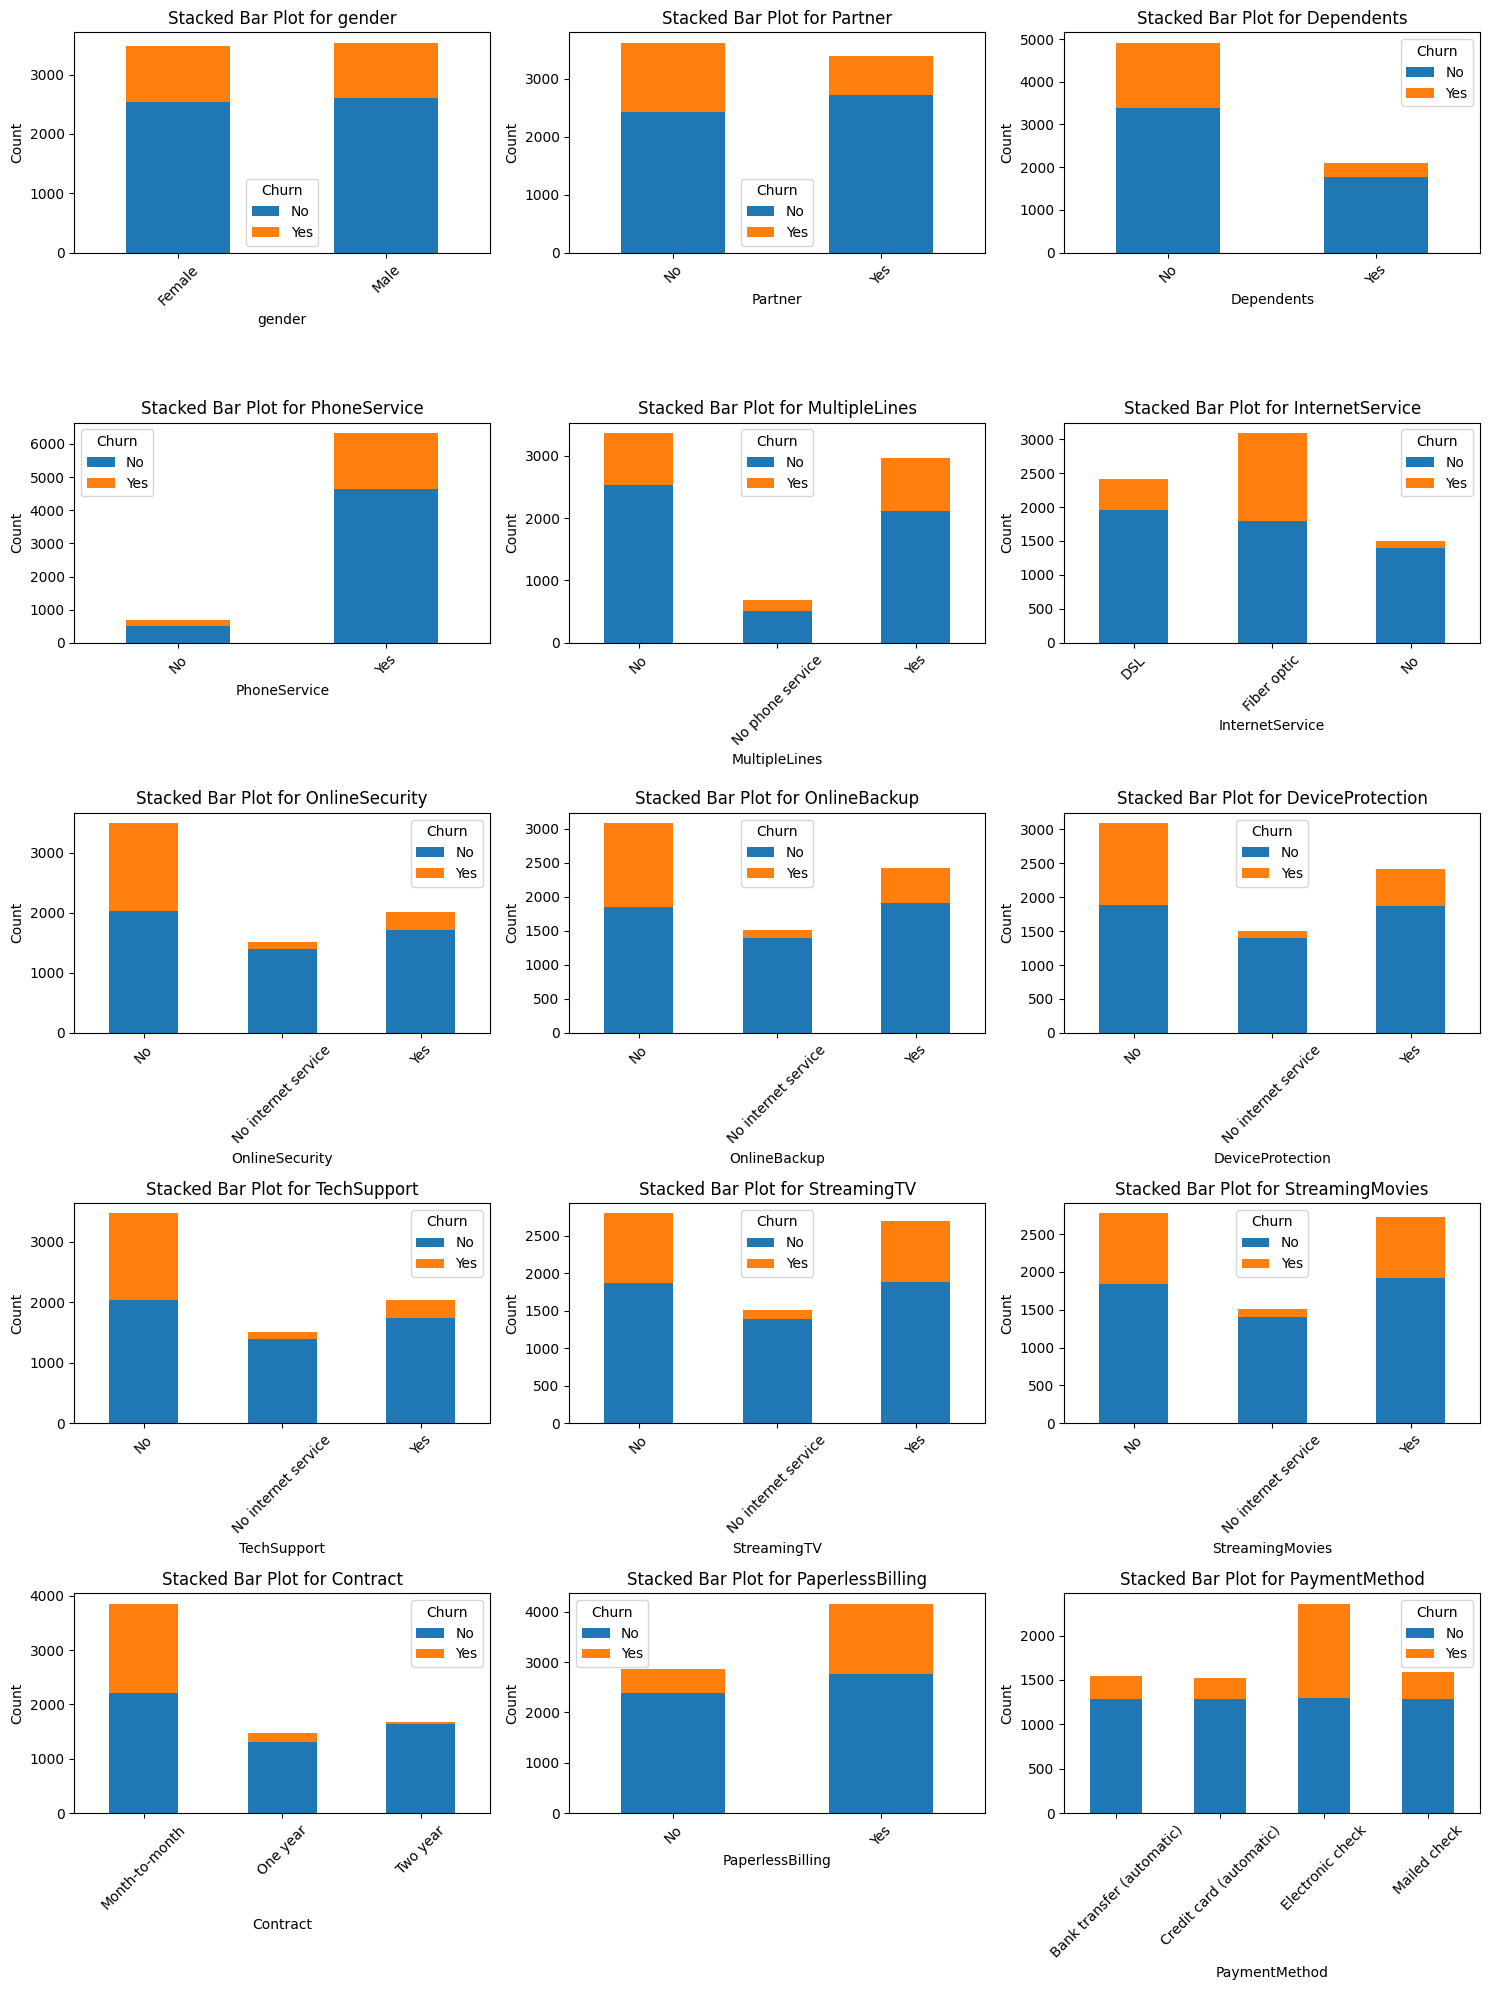

In [ ]:
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]
plt.figure(figsize=(15, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)

    crosstab = pd.crosstab(train_data[feature], train_data['Churn'])

    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())  # Use `plt.gca()` to get the current subplot
    plt.title(f'Stacked Bar Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()


## Check whether a dataset is Balanced or Imbalanced ?

In [ ]:
# final in Eda let's check there in data is Imbalance or not in Target Variable -->> "Chrun"
print(train_data["Churn"].value_counts())

Churn
No     5153
Yes    1857
Name: count, dtype: int64


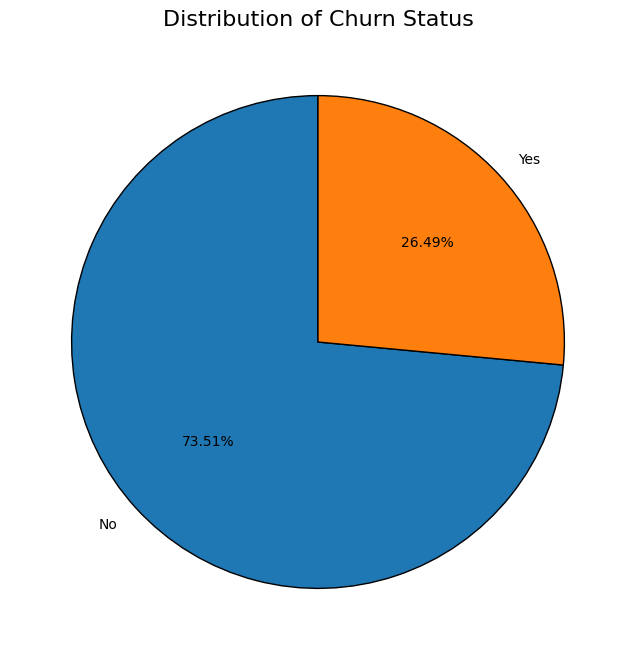

In [ ]:
labels = train_data["Churn"].value_counts().index
values = train_data["Churn"].value_counts().values

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Distribution of Churn Status', fontsize=16)
plt.show()

Observation:

The pie chart and the value counts clearly indicate that the dataset is imbalanced. The majority of instances belong to the "No" class (73.51%), while only 26.49% belong to the "Yes" class. This imbalance can potentially affect the model's performance, as it may be biased towards the majority class.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [ ]:
# Checking for Unique Values and Potential Nulls in Categorical Features
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for faeture in categorical_features:
  print(f"{faeture} : {train_data[faeture].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
train_data.shape

(7010, 20)

# Model Preprocessing steps

In [ ]:
x =  train_data.drop("Churn",axis =1)
y = train_data["Churn"]

In [ ]:
columns_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])


In [ ]:
# encode the target varibale
y = y.map({"No":0,"Yes":1})
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
# encode categorical feature
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False,drop = 'first')
ohe_x = OHE.fit_transform(x[categorical_features])  # numpy array
ohe_x_df = pd.DataFrame(ohe_x,columns = OHE.get_feature_names_out()) # convert to dataframe # columns get by using ohe.get_feature_names_out() method
ohe_x_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x = x.drop(categorical_features,axis=1)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0.000000,0.115423,0.001275
1,0,0.464789,0.385075,0.215867
2,0,0.014085,0.354229,0.010310
3,0,0.619718,0.239303,0.210241
4,0,0.014085,0.521891,0.015330


In [ ]:
# lets's concatenate the "x" and "ohe_x_df"
X = pd.concat([x,ohe_x_df],axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X.isnull().sum()

,0
SeniorCitizen,33
tenure,33
MonthlyCharges,33
TotalCharges,33
gender_Male,33
Partner_Yes,33
Dependents_Yes,33
PhoneService_Yes,33
MultipleLines_No phone service,33
MultipleLines_Yes,33


In [ ]:
print(x.shape)
print(ohe_x_df.shape)

(7010, 4)
(7010, 26)


In [ ]:
print(x.index)
print(ohe_x_df.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
      dtype='int64', length=7010)
RangeIndex(start=0, stop=7010, step=1)


In [ ]:
# reset the index of "x" dataframe
x.reset_index(drop=True, inplace=True)
print(x.index)

RangeIndex(start=0, stop=7010, step=1)


null value issue solve let's concatenate and Recheck

In [ ]:
X = pd.concat([x,ohe_x_df],axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# recheck if there wasnull value
X.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0


 Issue solve

# train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(5608, 30)

In [ ]:
y_train.shape

(5608,)

## Handling Imbalanced Dataset Using SMOTE

**Need :**

Balancing the target class is crucial because the dataset is imbalanced, with 73.51% of instances in the "No" class and only 26.49% in the "Yes" class. This imbalance can lead to a model that is biased towards predicting the majority class, potentially reducing its effectiveness in accurately identifying at-risk customers.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_res , y_train_res = smote.fit_resample(x_train,y_train)

In [ ]:
x_train_res.shape

(8144, 30)

In [ ]:
y_train_res.shape

(8144,)

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, auc

In [ ]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
for model_name, model in classification_models.items():
  model = model
  model.fit(x_train_res,y_train_res)
  y_pred = model.predict(x_test)

  print(f"{model_name}")
  print(f"Accuracy Score :{accuracy_score(y_test,y_pred)}")
  print(f"classification_report :\n {classification_report(y_test,y_pred)}")
  print(f"confusion matrix : \n {confusion_matrix(y_test,y_pred)}")
  print("*"*60)

Logistic Regression
Accuracy Score :0.7432239657631954
classification_report :
               precision    recall  f1-score   support

           0       0.93      0.73      0.81      1081
           1       0.46      0.80      0.59       321

    accuracy                           0.74      1402
   macro avg       0.70      0.76      0.70      1402
weighted avg       0.82      0.74      0.76      1402

confusion matrix : 
 [[784 297]
 [ 63 258]]
************************************************************
K-Nearest Neighbors
Accuracy Score :0.6890156918687589
classification_report :
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      1081
           1       0.40      0.71      0.51       321

    accuracy                           0.69      1402
   macro avg       0.64      0.70      0.64      1402
weighted avg       0.78      0.69      0.71      1402

confusion matrix : 
 [[738 343]
 [ 93 228]]
*************************************

**Obseravtion :**
- Random Forest is the best model for predicting customer churn because it has the highest accuracy at 0.79, outperforming all other models.

- It also provides a good balance between precision (0.53) and recall (0.62), effectively identifying churners while avoiding too many false positives.
- Additionally, its consistent performance is reflected in a solid F1-score of 0.57 for churners, making it a reliable choice overall.

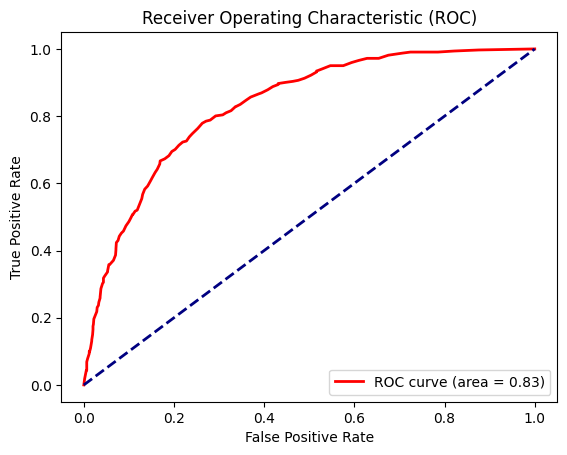

In [ ]:
# roc auc curve
rf = RandomForestClassifier()
rf.fit(x_train_res,y_train_res)

y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Observation:
The Random Forest model achieves a robust ROC AUC score of 0.83, indicating strong performance in distinguishing between churners and non-churners.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

grid_search.fit(x_train_res,y_train_res)

best_params =  grid_search.best_params_
best_model  =  grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")

y_pred = best_model.predict(x_test)
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model: RandomForestClassifier(max_features='log2', n_estimators=300)
Best Model Accuracy: 0.7931526390870185


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(best_model,x_train_res,y_train_res,cv=5)
print(f"Cross Validation Score : {cv_score}")
print(f"Mean Cross Validation Score : {cv_score.mean()}")

Cross Validation Score : [0.78698588 0.80110497 0.89073051 0.87292818 0.8980344 ]
Mean Cross Validation Score : 0.8499567875258484


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(best_model,n_features_to_select=25)
rfe.fit(x_train_res,y_train_res)

selected_features = x_train_res.columns[rfe.support_]
print(f"Selected Features : {selected_features}")



Selected Features : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
x_train_selected = x_train_res[selected_features]
x_test_selected = x_test[selected_features]


best_model.fit(x_train_selected, y_train_res)


y_pred = best_model.predict(x_test_selected)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

cv_scores = cross_val_score(best_model, x_train_selected, y_train_res, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Accuracy Score: 0.7924393723252496
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1081
           1       0.54      0.62      0.58       321

    accuracy                           0.79      1402
   macro avg       0.71      0.73      0.72      1402
weighted avg       0.80      0.79      0.80      1402

Confusion Matrix:
[[911 170]
 [121 200]]
Cross-Validation Scores: [0.78268877 0.80171885 0.88213628 0.86863106 0.89250614]
Mean Cross-Validation Score: 0.8455362192931254


Obseravtion:

With 25 features, the Random Forest model achieved an accuracy score of 0.79, demonstrating strong overall performance. The precision for identifying churners is 0.54, while recall is 0.62, indicating the model effectively balances identifying churners and minimizing false positives. The mean cross-validation score of 0.85 reflects robust and consistent performance across different data splits. Overall, the model's solid accuracy and stability with 25 features make it a reliable tool for predicting customer churn and optimizing retention strategies.


In [ ]:
from joblib import dump, load

# Save the best model
dump(best_model, 'best_model.joblib')


['best_model.joblib']